# 1. Import data and libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
%matplotlib inline

In [92]:
path = r'/Users/marcela/Desktop/CF/Data Immersion/Achievement 6/Brazilian Ecommerce Analysis'

In [93]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ecommerce_merge.pkl'))

# 2. Data Cleaning

In [94]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [95]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [96]:
df.shape

(18079641, 39)

In [97]:
# Duplicates
print(df.duplicated().sum())

5704849


In [98]:
# Drop duplicates
df.drop_duplicates()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079635,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty
18079636,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty
18079637,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty
18079639,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty


In [99]:
df = df.drop_duplicates()

In [100]:
df.shape

(12374792, 39)

# 3. Hypothesis

## "There is a direct correlation between the product's weight and the freight value."
### This suggests that as the weight of a product increases, the cost of its shipping is likely to rise as well. 
### This relationship will be explored and verified through linear regression analysis.

# 4. Data Prep for Regression Analysis

In [101]:
# Selecting a subset of the DataFrame
df_subset = df[['product_weight_g', 'freight_value']].dropna()

# Assigning X (independent variables) and y (dependent variable)
X = df_subset[['product_weight_g']]  # Feature
y = df_subset['freight_value']       # Target

In [102]:
df_subset

,product_weight_g,freight_value
0,500.0,8.72
1,500.0,8.72
2,500.0,8.72
3,500.0,8.72
4,500.0,8.72
...,...,...
18079635,150.0,18.36
18079636,150.0,18.36
18079637,150.0,18.36
18079639,150.0,18.36


In [103]:
# Consistency Checks
print(df_subset.describe())  

       product_weight_g  freight_value
count      1.228690e+07   1.228690e+07
mean       2.157044e+03   1.974055e+01
std        3.836287e+03   1.500347e+01
min        0.000000e+00   0.000000e+00
25%        3.000000e+02   1.351000e+01
50%        7.000000e+02   1.632000e+01
75%        1.850000e+03   2.068000e+01
max        4.042500e+04   4.096800e+02


In [104]:
# Missing Values
print(df_subset.isnull().sum()) 

product_weight_g    0
freight_value       0
dtype: int64


In [105]:
# Checking the mean
df_subset['freight_value'].mean()

19.740554603005116

In [106]:
# Checking the median
df_subset['freight_value'].median()

16.32

In [107]:
# Finding the highest freight charge in the dataset
df_subset['freight_value'].max() 

409.68

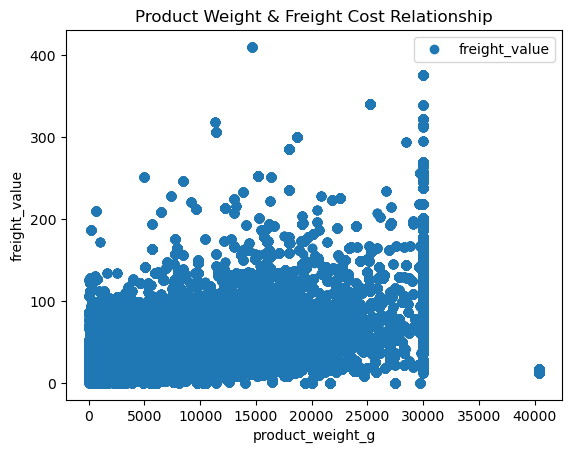

In [108]:
# Creating a scatterplot to see how the variables plot against each-other

df_subset.plot(x = 'product_weight_g', y='freight_value',style='o') 
plt.title('Product Weight & Freight Cost Relationship')  
plt.ylabel('freight_value') 
plt.xlabel('product_weight_g')  
plt.show()

In [109]:
# Handling any potential missing values in the DataFrame
subset_cleaned = df_subset.dropna(subset=['product_weight_g', 'freight_value'])

# Extract the variables as NumPy arrays and reshape them
X = subset_cleaned['product_weight_g'].to_numpy().reshape(-1, 1)
y = subset_cleaned['freight_value'].to_numpy().reshape(-1, 1)

In [110]:
X

array([[500.],
       [500.],
       [500.],
       ...,
       [150.],
       [150.],
       [150.]])

In [111]:
y

array([[ 8.72],
       [ 8.72],
       [ 8.72],
       ...,
       [18.36],
       [18.36],
       [18.36]])

In [112]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression Analysis

In [113]:
# Creating a regression object
regression = LinearRegression() 

In [114]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [115]:
# Predicting the values of y using x
y_predicted = regression.predict(X_test)

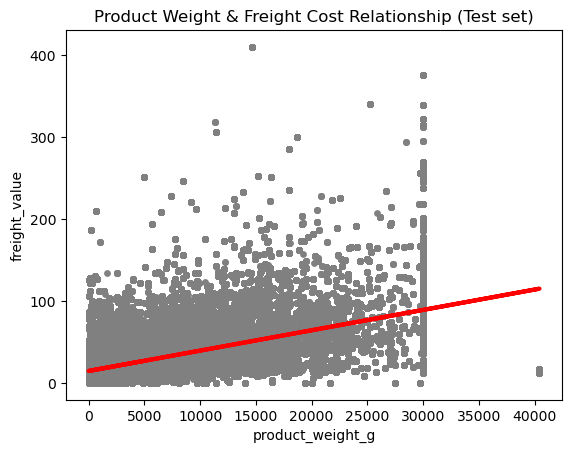

In [116]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Product Weight & Freight Cost Relationship (Test set)')
plot_test.xlabel('product_weight_g')
plot_test.ylabel('freight_value')
plot_test.show()

In [117]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [118]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00248281]]
Mean squared error:  134.09947275321002
R2 score:  0.40111453149647636


In [119]:
y_predicted

array([[15.13444594],
       [39.09352505],
       [18.94803615],
       ...,
       [15.57638543],
       [31.39682606],
       [26.1829332 ]])

In [120]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,15.40,15.134446
1,25.74,39.093525
2,21.05,18.948036
3,11.85,15.631007
4,18.67,15.208930
5,18.16,18.362094
6,13.07,16.574473
7,7.39,15.042582
8,15.38,15.010306
9,19.80,34.624474


# 6. Comparing how the regression fits the training set

In [121]:
# Predict
y_predicted_train = regression.predict(X_train)

In [122]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [123]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00248281]]
Mean squared error:  134.8666726508994
R2 score:  0.4022226874839637


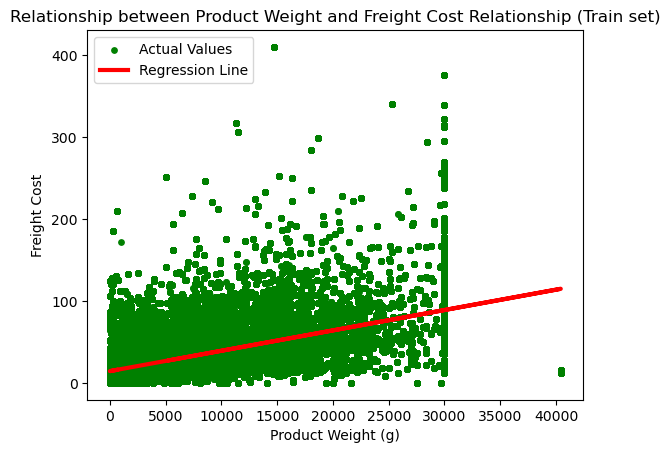

In [124]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15, label='Actual Values')
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3, label='Regression Line')
plot_test.title('Relationship between Product Weight and Freight Cost Relationship (Train set)')
plot_test.xlabel('Product Weight (g)')
plot_test.ylabel('Freight Cost')
plot_test.legend()
plot_test.show()

# 7. Interpretation of how well the line appears to fit the data

### The slope of the regression line, at approximately 0.0025, indicates a positive but relatively gentle upward trend. This implies that while there is a noticeable increase in freight cost with increasing product weight, the rate of this increase is modest. The slope alone, however, doesn't provide a complete picture of the fit.

# 8. Model performance statistics—MSE and R2 score

## Mean Squared Error (MSE): 
### The MSE value, while high, needs to be contextualized within the large dataset. It suggests that the model's predictions are not extremely close to the actual values, which might be due to the complexity and variability within the data.

## R2 Score: 
### An R2 score of 0.40 indicates that the model explains 40% of the variance in freight costs, which is significant but also implies that 60% of the variance is due to other factors not captured by the model.

# 9. How well the model performed on the test set

### The model's performance, as indicated by the MSE and R2 score, suggests it has moderate predictive accuracy. It is effective to a certain extent in forecasting freight costs based on product weight, but there is significant room for improvement.

### The presence of a large MSE in a dataset with millions of rows hints at the possibility of high variability or noise in the data, which could be due to unaccounted variables or inherent complexities in the data.

### The fact that the R2 score is 0.40 implies that while product weight is a significant factor in determining freight costs, it is not the only one. This suggests that other variables, possibly related to logistics, product type, or geographic factors, might also play a crucial role.

## Data Bias Impact: 
### If the dataset is biased or not representative of the wider population (e.g., if it overrepresents certain types of products or shipping routes), the model's predictions could be skewed. This would limit the generalizability of the findings.